**Team 8**

**Code by Jason, Sheza, Lincoln, Fayiaz, Elle, Bineta**

**Mentor:** Karan 

**Data:** bop_data_retrieved_by_ian

**Research question:** How do natural factors affect oyster health?




In [ ]:
#1. OG Data (with the original df) 
import requests 
import numpy as np  
import pandas as pd 
import statistics as stats 
import matplotlib.pyplot as plt 

url = 'https://raw.githubusercontent.com/PACESTEM/STEMINSTITUTE2020/main/bop_data_retrivedbyian.csv'
data = pd.read_csv(url)
df = pd.DataFrame(data)


def get_mean_without_outliers(df=None, upper_outlier=0, lower_outlier=0):
  total = 0
  length = 0
  for value in df:
    # If upper_outlier exists, check if each value is lower than upper_limit
    # if so, add to total and increment length
    if upper_outlier != 0:
      if value <= upper_outlier:
        total += value
        length += 1 
    # If lower_outlier exists, check if each value is greater than lower_outlier
    # if so, add to total and increment length
    elif value >= lower_outlier:
        total += value
        length += 1
    # Return mean (total/length) to 2 decimal points
  return float(f'{total/length:.2f}')


def replace_outliers(df=None, upper_limit=0, lower_limit=0, mean=0):
    # Make a copy of the data frame
  new_df = df.copy()
  for i in range(len(new_df)):
    # If upper_limit exists, check if each value is greater than upper_limit
    # if so, assign the value to the provided mean
    if upper_limit != 0:
      if new_df[i] > upper_limit:
        new_df[i] = mean
    # Else a lower_limit exists and check if value is lower than lower_limit
    # if so, assign the value to the provided mean
    elif new_df[i] < lower_limit:
        new_df[i] = mean
  return new_df.to_frame()

# Returns array with unnessary column-names
def drop_trials(arr):
  # Preset with columns that are null
  new_arr = ['dissolvedOxygen', 'pH', 'salinity', 'waterTemperature', 'turbidity']
  for s in arr:
    # If column name ends with 0, 1, or 2, drop the column
    if s.endswith('0') or s.endswith('1') or s.endswith('2'):
      new_arr.append(s)
  return new_arr

# pH_average (Cleaned Data)
ph = df['pH_average']
ph_mean = get_mean_without_outliers(ph, upper_outlier=17)
ph_clean_df = replace_outliers(ph, upper_limit=17, mean=ph_mean)

# waterTemperature (Cleaned Data)
water_temps = df['waterTemperature_average']
water_temps_mean = get_mean_without_outliers(water_temps, upper_outlier=79)
water_temps_clean_df = replace_outliers(water_temps, upper_limit=79, mean=water_temps_mean)

# replacing the 'average' columns with the clean columns
trial = df.copy()
trial['pH_average'] = ph_clean_df
trial['waterTemperature_average'] = water_temps_clean_df  

# Cleaning trial
trial = trial.drop(columns=drop_trials(list(df.columns)))

# Creating final_df
final_df = trial.copy()

# Graphs - for storytelling (not the final graphs)
final_df_copy = final_df.copy()



'''
plt.xlabel('Rained In 7 Days')
plt.ylabel('Average Turbidity') 
rain_vs_turbidity = final_df_copy.groupby('rainedIn7Days')['turbidity_average'].mean().plot(kind='bar', title='How Rain Affected Avergae Turbidity')
plt.show() 

plt.xlabel('Rained In 7 Days')
plt.ylabel('Average Water Temperature')
rain_vs_waterTemp = final_df_copy.groupby('rainedIn7Days')['waterTemperature_average'].mean().plot(kind='bar', title='How Rain Affected Water Temperature')
plt.show()

plt.xlabel('Rained In 7 Days')
plt.ylabel('Average Salinity')
rain_vs_salinity = final_df_copy.groupby('rainedIn7Days')['salinity_average'].mean().plot(kind='bar', title='How Rain Affected Salinity')
plt.show()

plt.xlabel('Rained In 7 Days') 
plt.ylabel('Average pH')
rain_vs_salinity = final_df_copy.groupby('rainedIn7Days')['pH_average'].mean().plot(kind='bar', title='How Rain Affected Average pH')
plt.show() 

plt.xlabel('Rained In 24 hours') 
plt.ylabel('Average pH')
rain_vs_salinity = final_df_copy.groupby('rainedIn24Hours')['pH_average'].mean().plot(kind='bar', title='Rain (24hrs) vs. Average pH')
plt.show()

plt.xlabel('Rained In 24 hours') 
plt.ylabel('Average Water Temperature')
rain_vs_salinity = final_df_copy.groupby('rainedIn24Hours')['waterTemperature_average'].mean().plot(kind='bar', title='Rain (24hrs) vs. Average Water Temperature')
plt.show()

plt.xlabel('Rained In 24 hours') 
plt.ylabel('Average Turbidity')
rain_vs_salinity = final_df_copy.groupby('rainedIn24Hours')['turbidity_average'].mean().plot(kind='bar', title='Rain (24hrs) vs. Average Turbidity')
plt.show()

plt.xlabel('Rained In 24 hours') 
plt.ylabel('Average Salinity')
rain_vs_salinity = final_df_copy.groupby('rainedIn24Hours')['salinity_average'].mean().plot(kind='bar', title='Rain (24hrs) vs. Average Salinity')
plt.show()

import plotly.express as px
from numpy import * 
merging_graphs = final_df_copy.groupby('rainedIn24Hours')['salinity_average', 'pH_average', 'waterTemperature_average', 'turbidity_average'].mean().plot(kind='bar') 
plt.show()

fig = px.scatter_3d(data_frame=final_df_copy, x='dissolvedOxygen_average', y='pH_average', z='turbidity_average', color = 'pH_average')
fig.show()
'''

"\nplt.xlabel('Rained In 7 Days')\nplt.ylabel('Average Turbidity') \nrain_vs_turbidity = final_df_copy.groupby('rainedIn7Days')['turbidity_average'].mean().plot(kind='bar', title='How Rain Affected Avergae Turbidity')\nplt.show() \n\nplt.xlabel('Rained In 7 Days')\nplt.ylabel('Average Water Temperature')\nrain_vs_waterTemp = final_df_copy.groupby('rainedIn7Days')['waterTemperature_average'].mean().plot(kind='bar', title='How Rain Affected Water Temperature')\nplt.show()\n\nplt.xlabel('Rained In 7 Days')\nplt.ylabel('Average Salinity')\nrain_vs_salinity = final_df_copy.groupby('rainedIn7Days')['salinity_average'].mean().plot(kind='bar', title='How Rain Affected Salinity')\nplt.show()\n\nplt.xlabel('Rained In 7 Days') \nplt.ylabel('Average pH')\nrain_vs_salinity = final_df_copy.groupby('rainedIn7Days')['pH_average'].mean().plot(kind='bar', title='How Rain Affected Average pH')\nplt.show() \n\nplt.xlabel('Rained In 24 hours') \nplt.ylabel('Average pH')\nrain_vs_salinity = final_df_copy.gr

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



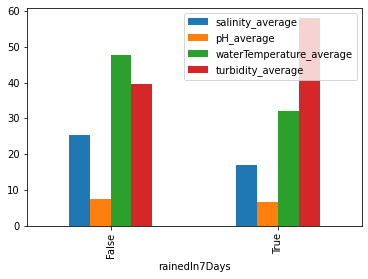

In [ ]:
rainedIn7Days_graph = final_df_copy.groupby('rainedIn7Days')['salinity_average', 'pH_average', 'waterTemperature_average', 'turbidity_average'].mean().plot(kind='bar') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



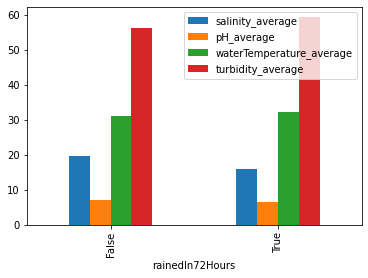

In [ ]:
rainedIn72Hours_graph = final_df_copy.groupby('rainedIn72Hours')['salinity_average', 'pH_average', 'waterTemperature_average', 'turbidity_average'].mean().plot(kind='bar') 
plt.show()

import seaborn as sns
td = final_df_copy.copy()
of = pd.DataFrame()
of['dissolvedOxygen_average'] = td['dissolvedOxygen_average']
of['pH_average'] = td['pH_average']
of['turbidity_average'] = td['turbidity_average']
of['salinity_average'] = td['salinity_average']
print(of)
sns.heatmap(of.corr(method='pearson'),annot=True)

In [ ]:
import plotly.express as plx
fig = plx.scatter_3d(final_df, x = 'turbidity_average', y = 'pH_average', z ='salinity_average', color = 'pH_average')
fig.show()

In [ ]:
import plotly.express as px
fig = px.parallel_categories(data_frame=final_df,dimensions=['turbidity_average','waterColor'],color_continuous_scale=px.colors.sequential.Inferno, color='turbidity_average')
fig.show()